<a href="https://colab.research.google.com/github/farhanlhsn/Tugas-Besar-AKA/blob/main/TuBes_AKA_Optimasi_Pencarian_Plat_Nomor_Kendaraan_Menggunakan_Algoritma_Hashing_dan_Trie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

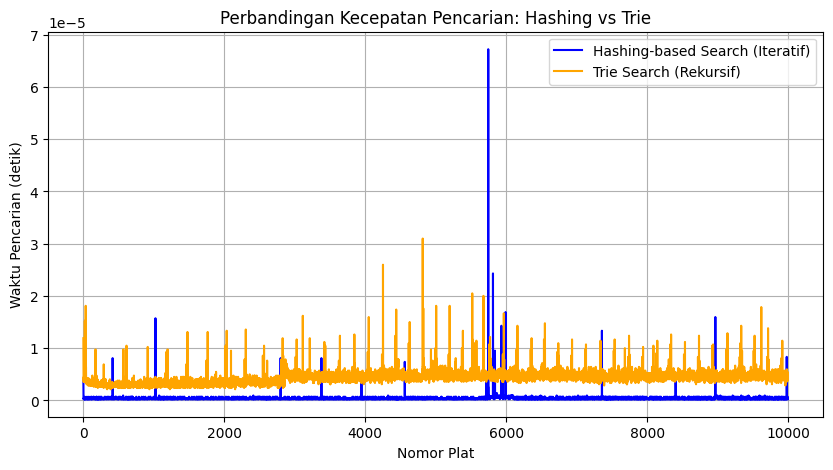

In [ ]:
import time
import random
import string
import matplotlib.pyplot as plt

# Implementasi Hashing-based Search
class HashTable:
    def __init__(self):
        self.table = {}

    def insert(self, plate_number):
        self.table[plate_number] = True

    def search(self, plate_number):
        # Hashing-based search dilakukan secara iteratif
        return plate_number in self.table

# Implementasi Trie Search
class TrieNode:
    def __init__(self):
        self.children = {}
        self.is_end_of_plate = False

class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert_recursive(self, node, plate_number, index):
        # Rekursi untuk memasukkan string ke dalam Trie
        if index == len(plate_number):
            node.is_end_of_plate = True
            return
        char = plate_number[index]
        if char not in node.children:
            node.children[char] = TrieNode()
        self.insert_recursive(node.children[char], plate_number, index + 1)

    def insert(self, plate_number):
        # Memulai rekursi dari root
        self.insert_recursive(self.root, plate_number, 0)

    def search_recursive(self, node, plate_number, index):
        # Rekursi untuk mencari string di dalam Trie
        if index == len(plate_number):
            return node.is_end_of_plate
        char = plate_number[index]
        if char not in node.children:
            return False
        return self.search_recursive(node.children[char], plate_number, index + 1)

    def search(self, plate_number):
        # Memulai pencarian rekursif dari root
        return self.search_recursive(self.root, plate_number, 0)

# Fungsi untuk menghasilkan plat nomor acak
def generate_plate_number(length=7):
    return ''.join(random.choices(string.ascii_uppercase + string.digits, k=length))

# Jumlah plat nomor yang akan diuji
num_plates = 10000
plates = [generate_plate_number() for _ in range(num_plates)]

# Pengujian Hashing-based Search
hash_table = HashTable()
for plate in plates:
    hash_table.insert(plate)

hash_search_times = []
for plate in plates:
    start_time = time.time()
    hash_table.search(plate)
    hash_search_times.append(time.time() - start_time)

# Pengujian Trie Search
trie = Trie()
for plate in plates:
    trie.insert(plate)

trie_search_times = []
for plate in plates:
    start_time = time.time()
    trie.search(plate)
    trie_search_times.append(time.time() - start_time)

# Grafik perbandingan
plt.figure(figsize=(10, 5))
plt.plot(hash_search_times, label='Hashing-based Search (Iteratif)', color='blue')
plt.plot(trie_search_times, label='Trie Search (Rekursif)', color='orange')
plt.title('Perbandingan Kecepatan Pencarian: Hashing vs Trie')
plt.xlabel('Nomor Plat')
plt.ylabel('Waktu Pencarian (detik)')
plt.legend()
plt.grid()
plt.show()
